Q2 gas turbines


In [1]:
import pandas as pd 
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from __future__ import absolute_import, division, print_function

In [3]:
gast  = pd.read_csv("gas_turbines.csv")
gast

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
gast.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
gast.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [6]:
gast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
gast[gast.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

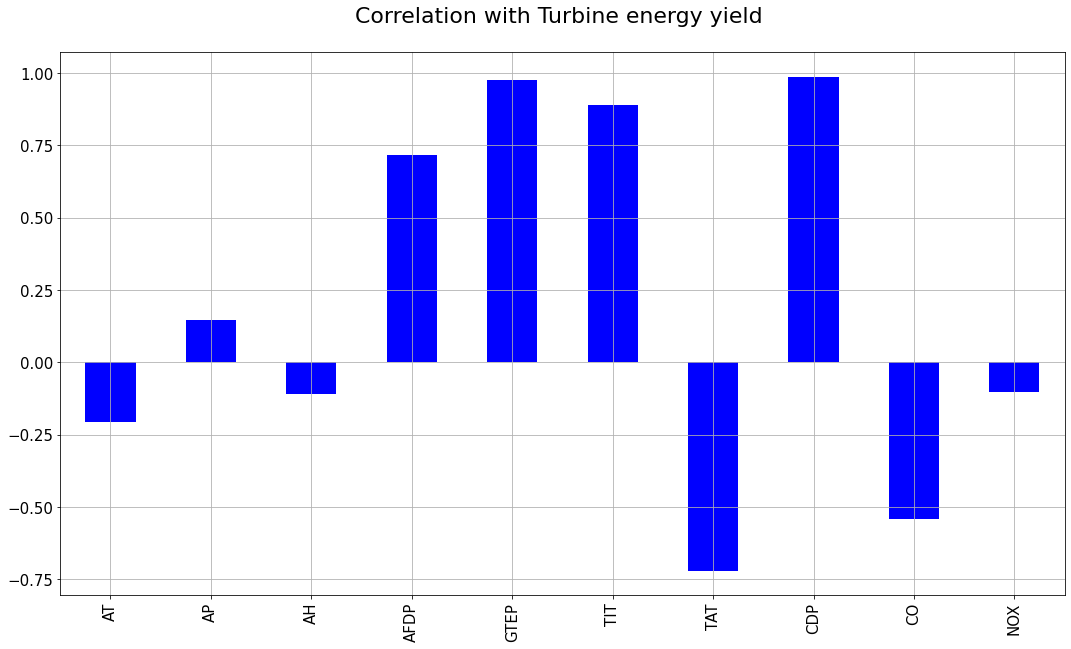

In [8]:
# correlation with TEY

data2 = gast.copy()

correlations = data2.corrwith(gast["TEY"])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'b',
        rot = 90, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

# Preprocessing

In [9]:
# splits the data into train and test

train_data=gast.sample(frac=0.8,random_state=0)
test_data=gast.drop(train_data.index)

In [10]:
# look overall statistics

train_stats = train_data.describe()
train_stats.pop('TEY')
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
AT,12031.0,17.741588,7.587113,0.522300,11.38850,18.115,23.82300,34.9290
AP,12031.0,1013.238389,6.365782,986.160000,1009.00000,1012.800,1016.90000,1034.2000
AH,12031.0,79.134583,13.820613,30.344000,69.73100,82.395,90.02250,100.2000
AFDP,12031.0,4.197000,0.762093,2.087400,3.72080,4.184,4.54930,7.6106
GTEP,12031.0,25.396946,4.187552,17.878000,23.25450,25.052,27.10450,37.4020
TIT,12031.0,1083.658881,16.641844,1000.800000,1078.80000,1088.500,1095.90000,1100.6000
TAT,12031.0,545.382701,7.891120,512.450000,542.29000,549.890,550.05000,550.6100
CDP,12031.0,12.096597,1.106458,9.904400,11.59050,12.022,12.55550,15.0550
CO,12031.0,1.989508,2.279006,0.000388,0.85467,1.393,2.18485,44.1030
NOX,12031.0,68.251009,10.567500,27.765000,61.29200,66.648,74.04300,119.8900


In [11]:
#splits feature from labels

train_labels = train_data.pop('TEY')
test_labels = test_data.pop('TEY')

In [12]:
# normalize the data

def norm(x):
    return(x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

# Model Building 

In [13]:
# Build the model 

def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation=tf.nn.relu,input_shape=[len(train_data.keys())]),
         layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae','mse','accuracy'])
    return model
   

In [14]:
model = build_model()

In [15]:
# Inspect the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [16]:
example_batch = normed_train_data[:10]
example_result= model.predict(example_batch)
example_result

1/1 [==============================] - 0s 116ms/step


array([[ 0.08593501],
       [-0.4828609 ],
       [-0.10405699],
       [-0.17847082],
       [-0.09576228],
       [-0.19250937],
       [-0.02390468],
       [-0.37142822],
       [-0.14041041],
       [-0.2657834 ]], dtype=float32)

In [24]:
# Train the model for 100 epoch
#Train the model 
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print('.', end='')
EPOCHS=100
history = model.fit(
 normed_train_data,train_labels,
 epochs=EPOCHS, validation_split = 0.2, verbose = 0,
 callbacks=[PrintDot()])


.

In [25]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
95,0.840923,0.683107,0.840923,0.0,0.641529,0.608136,0.641529,0.0,95
96,0.846492,0.696776,0.846492,0.0,0.585213,0.611288,0.585213,0.0,96
97,0.849674,0.696321,0.849674,0.0,0.844767,0.706020,0.844767,0.0,97
98,0.862631,0.689190,0.862631,0.0,0.519571,0.545942,0.519571,0.0,98
99,0.868313,0.691079,0.868313,0.0,0.663323,0.639788,0.663323,0.0,99


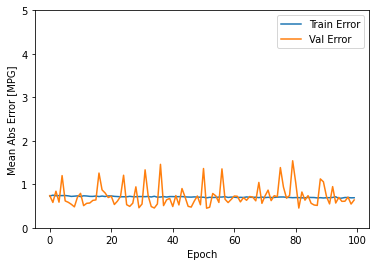

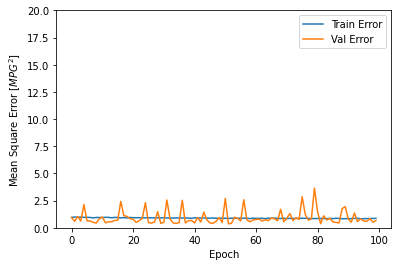

In [26]:
# Visualize the model's training progress
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'],hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'],hist['val_mse'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,20])

plot_history(history)


.

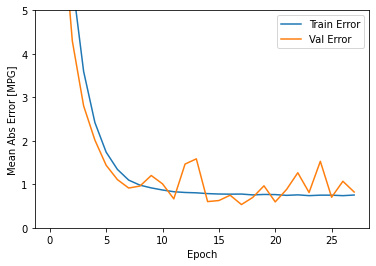

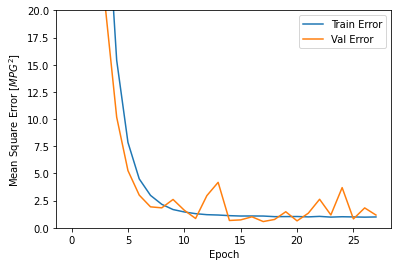

In [20]:
model = build_model()
# The patience parameter is the amount of epochs to check for improvement
early_stop= keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history=model.fit (normed_train_data,train_labels,epochs=EPOCHS,
                  validation_split = 0.2, verbose=0, callbacks=[early_stop,PrintDot()])
plot_history(history)

In [28]:
# let's see how well the model generalizes by using test set
d=model.evaluate(normed_test_data,test_labels,verbose=0)
print('Testing set Mean Abs Error: ',d[1]*100)

Testing set Mean Abs Error:  63.138699531555176


# predict 

94/94 [==============================] - 0s 1ms/step


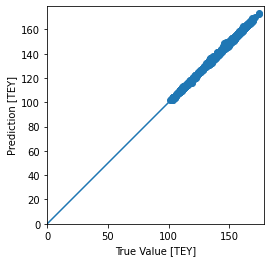

In [30]:
# finally predict TEY value using data in the testing set:

# fianlly, predict TEY values using data in the testing set:
test_prediction=model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_prediction)
plt.xlabel('True Value [TEY]')
plt.ylabel('Prediction [TEY]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_=plt.plot([-100,100],[-100,100])